## Capstone Project : Customer Churn 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_churn-1.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 # 1. Data Manipulation:


● Extract the 5th column and store it in ‘customer_5’

In [11]:
customer_5 = df.loc[:,['Dependents']]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


● Extract the 15th column and store it in ‘customer_15’

In [14]:
customer_15= df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

● Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’

In [17]:
senior_male_electronic = df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’

In [20]:
customer_total_tenure = df[(df['tenure']>70)|(df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


● Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes'

In [23]:
two_mail_yes = df[(df['Contract']=='Two year')& (df['PaymentMethod']=='Mailed check')&(df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


● Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’

In [26]:
customer_333 = df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4991,1502-XFCVR,Female,0,No,No,58,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.45,6145.85,Yes
3504,3678-MNGZX,Male,0,Yes,Yes,68,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1377.7,No
1011,6614-YOLAC,Female,0,Yes,Yes,71,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Mailed check,58.65,4145.25,No
4416,6217-TOWGS,Female,0,Yes,No,17,Yes,Yes,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),75.40,1322.55,No
3813,6837-HAEVO,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,105.00,7297.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,2800-QQUSO,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,100.30,4222.95,No
4462,6087-MVHJH,Female,0,No,No,16,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.45,1422.1,Yes
1197,8944-AILEF,Male,0,Yes,No,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.45,340.85,No
4786,6749-UTDVX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,103.65,7634.8,No


● Get the count of different levels from the ‘Churn’ column

In [29]:
Churn_count= df['Churn'].value_counts()
Churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 2. Data Visualization:
 ● Build a bar-plot for the ’InternetService’ column:
 a. Set x-axis label to ‘Categories of Internet Service’
 b. Set y-axis label to ‘Count of Categories’
 c. Set the title of plot to be ‘Distribution of Internet Service’
 d. Set the color of the bars to be ‘orange’

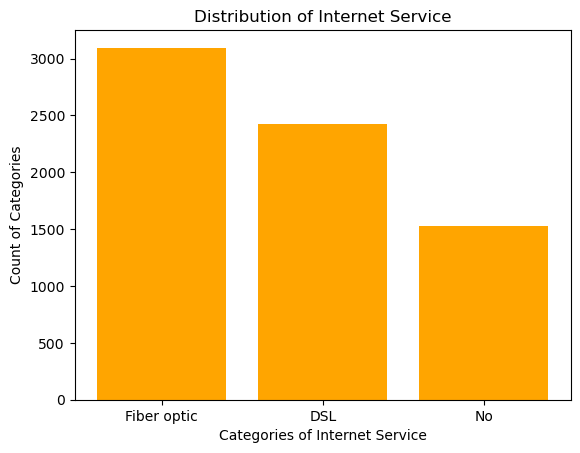

In [32]:
x= df['InternetService'].value_counts().keys().tolist()
y= df['InternetService'].value_counts()
plt.bar(x,y,color= 'orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

● Build a histogram for the ‘tenure’ column:
a. Set the number of bins to be 30
b. Set the color of the bins to be ‘green’
c. Assign the title ‘Distribution of tenure’

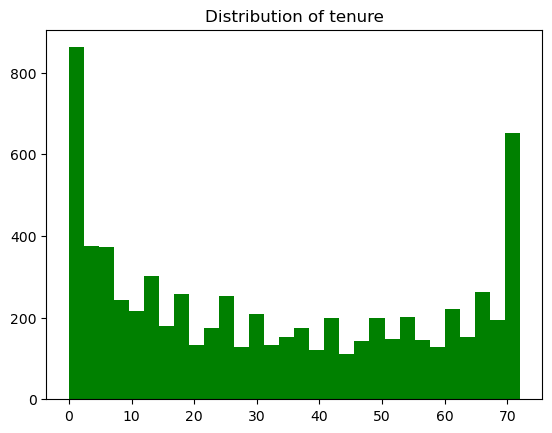

In [35]:
plt.hist(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')
plt.show()

● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
 ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
 a. Assign the points a color of ‘brown’
 b. Set the x-axis label to ‘Tenure of customer’
 c. Set the y-axis label to ‘Monthly Charges of customer’
 d. Set the title to ‘Tenure vs Monthly Charges’
 

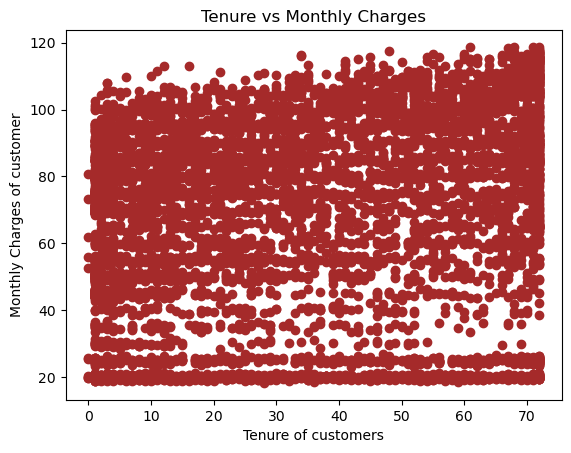

In [38]:
x = df['tenure'].tolist()
y = df['MonthlyCharges'].tolist()
plt.scatter(x,y,color='brown')
plt.xlabel('Tenure of customers')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis &
f. ‘Contract’ on the x-axis

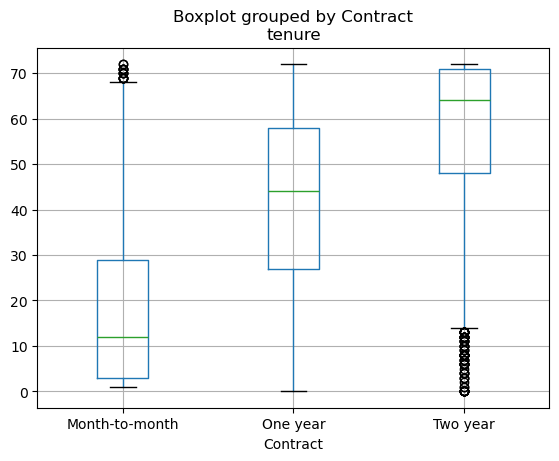

In [41]:
df.boxplot(column='tenure', by = 'Contract')
plt.show()

# 3. Linear Regression:
● Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
a. Divide the dataset into train and test sets in 70:30 ratio.
b. Build the model on train set and predict the values on test set
c. After predicting the values, find the root mean square error
d. Find out the error in prediction & store the result in ‘error’
e. Find the root mean square error

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['tenure']]
y = df['MonthlyCharges']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [64]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression() 


In [66]:
linear.fit(x_train, y_train)

LinearRegression()

In [68]:
y_predict = linear.predict(x_test) 


In [70]:
print("Predicted values:\n", y_predict[:5])


Predicted values:
 [55.10659011 67.43520921 70.82557946 55.10659011 75.44881163]


In [72]:
error = y_test.values - y_predict

In [74]:
error_df = pd.DataFrame(error, columns=['Prediction Error'])


In [76]:
print(error_df.head())


   Prediction Error
0        -30.306590
1        -42.185209
2        -51.475579
3         21.243410
4        -24.898812


In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
print('The mse obtained is :', mse)

The mse obtained is : 845.6091871095869


In [80]:
rmse = np.sqrt(mse)
print('The rmse obtained is :',rmse)

The rmse obtained is : 29.07936015646814


# 4. Logistic Regression:
 ● Build a simple logistic regression model where dependent variable is
 ‘Churn’ and independent variable is ‘MonthlyCharges’:
 a. Divide the dataset in 65:35 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and get the accuracy scuracy score

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [85]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [87]:
X = df[['MonthlyCharges']]  
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [89]:
logi_reg = LogisticRegression()
logi_reg.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_pred = logi_reg.predict(X_test)

In [93]:
print("Predicted values:\n", y_pred[:5])


Predicted values:
 [0 0 0 0 0]


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


In [97]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", round(accuracy, 2))

Confusion Matrix:
 [[1797    0]
 [ 669    0]]
Accuracy Score: 0.73


d. Build a multiple logistic regression model where dependent variable
 is
 ‘Churn’ and independent variables are ‘tenure’ and
 ‘MonthlyCharges’
 e. Divide the dataset in 80:20 ratio
 f. Build the model on train set and predict the values on test set
 g. Build the confusion matrix and get the accuracy score

In [100]:
X_multi = df[['tenure', 'MonthlyCharges']]
y_multi = df['Churn']

In [102]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.20, random_state=42)


In [104]:
log_reg_multi = LogisticRegression()
log_reg_multi.fit(X_train_multi, y_train_multi)

LogisticRegression()

In [114]:
y_pred_multi = log_reg_multi.predict(X_test_multi)


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test_multi, y_pred_multi)
accuracy = accuracy_score(y_test_multi, y_pred_multi)


In [118]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", round(accuracy, 2))

Confusion Matrix:
 [[944  92]
 [193 180]]
Accuracy Score: 0.8


# 5. Decision Tree:
 ● Build a decision tree model where dependent variable is ‘Churn’ and
 independent variable is ‘tenure’:
 a. Divide the dataset in 80:20 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and calculate the accuracy

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = pd.DataFrame(df['tenure']) 
y = pd.DataFrame(df['Churn'])

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [125]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [127]:
y_predict = Tree.predict(x_test) 


In [129]:

from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test,y_predict)
confusion

array([[965,  76],
       [281,  87]], dtype=int64)

In [131]:
accuracy = accuracy_score(y_test,y_predict)
accuracy         

0.7466288147622427

# 6. Random Forest:
 ● Build a Random Forest model where dependent variable is ‘Churn’ and
 independent variables are ‘tenure’ and ‘MonthlyCharges’:
 a. Divide the dataset in 70:30 ratio
 b. Build the model on train set and predict the values on test set
 c. Build the confusion matrix and calculate the accuracy

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = df[['tenure','MonthlyCharges']] 
y = df['Churn'] 

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [140]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

RandomForestClassifier()

In [142]:
y_predict = forest.predict(x_test) 


In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion = confusion_matrix(y_test,y_predict)
confusion

array([[1348,  212],
       [ 327,  226]], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test,y_predict)
accuracy    

0.7449124467581637